# 12. Shallow Neural Networks

Branislav Gerazov, FEEIT, CMUS

By using only one neuron the machine learning model can only solve linear problems.
In other words, if we want to learn a function it can only otput a linear function - **linear regression**, and in case of classification the neuron can only separate the two classes with a line in 2D or a plane in a higher dimensional feature space - **logistic regression**. 

Thus, **non-linear problems** that are usually encountered in practice, cannot be solved with one neuron.
To this end, software neurons are almost always used in architectures in which multiple neurons are interconnected.
We call these structures **neural networks**.

## 12.0. Architecture of Shallow Neural Networks

In the simplest case, neural networks have one **hidden layer** and one **output layer** of neurons, as shown in the figure.
Such models are called **shallow neural networks**.

<img align="middle" alt="Colored_neural_network" src="12_Colored_neural_network.png" width="300px" style="display:block; margin-left: auto; margin-right: auto;">

**Figure 1.** A shallow neural network with one hidden layer consisting of four neurons (blue), and one output layer consisting of 2 neurons (green). The input data (features) here have 3 dimensions and are usually drawn as an input layer (red).

* [Wikimedia - Artificial neural network](https://commons.wikimedia.org/w/index.php?curid=24913461)


As can be seen in Fig. 1, each hidden layer neuron is connected with each of the coefficients of the input vector $\mathbf{x}$.
Each neuron in the output layer is in turn connected to each neuron in the hidden layer.

Because of this inter-connection, this type of layers are  called **fully connected** or **dense** layers.
Even though simple, this architecture allows neural networks to model any non-linear function, i.e. they are **universal approximators**.

The output of a shallow neural network for a given input data vector $\mathbf{x}$ can be calculated by:

$$
    \mathbf{y}_h = f_h(\mathbf{a}_h) = f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) \, , \\
    \mathbf{y} = f_o(\mathbf{a}_o) = f_o(\mathbf{W}_o \mathbf{y}_h + \mathbf{b}_o)  \\
    \mathbf{y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) + \mathbf{b}_o) \, ,
$$

where $_h$ denotes the parameters and outputs obtained from the hidden layer, and $_o$ denotes those from the output layer.
This time, since we may have more neurons in each layer, their weights are distributed along the rows of the weight matrices $\mathbf{W}$ and their biases are contained in the column vectors $\mathbf{b}$.

The output of the network is obtained by processing the input data layer by layer until the output layer of the network is reached.
This process is called a **forward pass** or **feed forward**.

\* Deep neural networks have multiple hidden layers, we discuss them in the next chapter.

If a sequence of $N$ samples of the input data $\mathbf{x}_n$ is brought to the input, we get:

$$
    \mathbf{Y}_h = f_h(\mathbf{A}_h) = f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) \, , \\
    \mathbf{Y} = f_o(\mathbf{A}_o) = f_o(\mathbf{W}_o \mathbf{Y}_h + \mathbf{b}_o) \\
    \mathbf{Y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) + \mathbf{b}_o) \, .
$$

## 12.1. Output Nonlinearities

In order to use the gradient descent (GD) algorithm to train neural networks, all the output nonlinearities of the neurons in the network, as well as the loss function, must be differentiable.
Otherwise it would not be possible to calculate the gradient for each of the parameters of each of the neurons in the network.

This is why a discontinuous output function cannot be used, e.g. a cut-off of the activation with a sharp threshold:
$$
   y = f(a) = \begin{cases}
     1 & \mbox{if } a > 0.5 \\
     0 & \mbox{otherwise}
     \end{cases} \, .
$$

For this purpose, several continuous (differentiable) functions are in use.
Within a neural network, the output nonlinearities of the neurons in the hidden and output layers are usually different, so we will consider them separately.


### Output Nonlinearities in Hidden Layers

Typical choices for nonlinearities in the hidden layer are:

   - **sigmoid** - with output in the range 0 - 1

$$
\sigma(a) = \frac{1}{1+e^{-a}}
$$

   - **hyperbolic tangent** - with output in the range from -1 to 1, and
   
$$
\tanh(a) = \frac{e^{2a} - 1}{e^{2a} + 1}
$$

   - **half-wave rectifier**
$$
ReLU(a) = \begin{cases}
     a & \mbox{if } a > 0 \\
     0 & \mbox{otherwise}
\end{cases}
$$

The half-wave rectifier has a number of advantages including: simpler calculation of the output of the neurons, better propagation of the gradient in the training process, as well as the sparsity of the activation of the neurons -- with a random initialization of the weights, half of the neurons will output 0.
Therefore, it is often applied in the hidden layers of neural networks.

Another motivation for using this nonlinearity is the asymmetry with respect to the $y$-axis which is analogous to the way biological neurons work.

Let's display these output nonlinearities with Python.

Text(0, 0.5, 'Neuron Output')

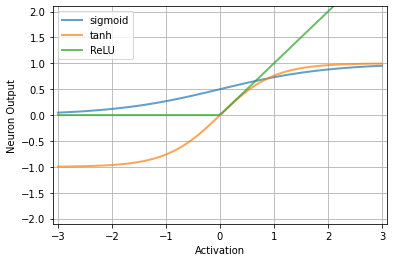

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(-3, 3, 100)
y_sigmoid = 1 / (1 + np.exp(-a))
y_tanh = (np.exp(2 * a) - 1) / (np.exp(2 * a) + 1)
y_relu = a.copy() 
y_relu[a < 0] = 0 
plt.plot(a, y_sigmoid, lw=2, alpha=0.7)
plt.plot(a, y_tanh, lw=2, alpha=0.7)
plt.plot(a, y_relu, lw=2, alpha=0.7)
plt.axis([-3.1, 3.1, -2.1, 2.1])
plt.grid(True)
plt.legend(["sigmoid", "tanh", "ReLU"])
plt.xlabel("Activation")
plt.ylabel("Neuron Output")

### Nonlinearities in the Output Layer

For neurons in the output layer, commonly used are:

   - **sigmoid** - for classification,
   - **softmax** - for classification with multiple output classes $J$:

$$
f(a_j) = \frac{e^{a_j}}{\sum_{j=0}^{J-1} e^{a_j}} \, ,
$$

where $a_j$ is the activation of the neuron corresponding to the class $j$; the softmax function normalizes the sum of the output of all output neurons, so it can be thought of as an approximation of the probability of each of the classes $f(a_j) \approx P(y = j \mid \mathbf{a})$,

   - **linear** - in regression models

$$
f(a) = a
$$

## 12.2. Loss Function

The choice of nonlinearity in the output layer will determine the choice of the network loss function.
Some loss functions have more favorable properties for some output nonlinearities versus others.

The following error functions are commonly used:

   - **mean squared error** - basic error function for regression and binary classification,

$$
MSE = \frac{1}{N} \sum_{n=0}^{N-1} (y - \tilde{y})^2
$$

   - **crossentropy** - it has a derivative with better characteristics in classification models in which the output nonlinearity is a sigmoid,

$$
CE = - \frac{1}{N} \sum_{n=0}^{N-1} y \ln \tilde{y} + (1-y) \ln(1-\tilde{y})
$$
   - **log-likelihood** - in models with a softmax output function.

$$
LL = - \ln \tilde{y}
$$

## 12.3. Training of Shallow Neural Networks

As we said in the previous chapter, neural networks are usually trained using the **gradient descent (GD)** algorithm.

As mentioned in Chapter 11., in shallow and deep neural networks, the calculation of the gradient for tuning the parameters $\theta$ starts with the calculation of the gradients for the output layer, and then goes back through (all) the hidden layer. 
This gives this process the name **backpropagation**.

\* The gradient backpropagation process is more pronounced in deep neural networks that have more hidden layers.

The **chain rule** from Calculus is used to calculate the partial derivative in respect to each of the network's parameters:
$$
   \frac{\partial \mathcal{L}}{\partial \theta_l} =
   \frac{\partial \mathcal{L}}{\partial \tilde{y}}
   \cdot \frac{\partial \tilde{y}}{\partial y_{L-2}}
   \, \cdots \, \frac{\partial y_{l+1}}{\partial \theta_{l+1}}
   \cdot \frac{\partial y_{l}}{\partial \theta_{l}}
   \, ,
$$

where $y_l$ is the output of the $l$th layer of the network and $L$ is the total number of layers.

### Initialization of the Network Parameters

Usually the initial values of the network parameters are determined randomly during its initialization. 
We should realize that the exact value of the parameters will affect the learning process. 
Thus, if we assume that the loss function $\mathcal{L}$ depends on the parameter $\theta$ as shown in Fig. 2, then we can see that training the network would be faster if the initial value of $\theta$ is closer to the minimum of $\mathcal{L}$, e.g. in position $\theta_B$ or $\theta_C$ instead of $\theta_A$. 
Of course, we don't know where the minimum of $\mathcal{L}$ is, but it can be benefitial to do several trainings on the same network starting from different initial parameter values.

<img align="middle" alt="Gradient descend start positions" src="12_gradient_descend_start.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Figure 2.** Choice of initial value of parameter $\theta$.

The problem of choosing a starting point is even greater if the loss function $\mathcal{L}$ has a more complex dependence on the parameter $\theta$, such as in Fig. 3. Then, the choice of initial value of $\theta$ can be crucial for optimal training of the network. From the three offered initial values, only from $\theta_C$ we can reach the optimal value of $\theta$ for which $\mathcal{L}$ has the smallest value, called the **global minimum**, through gradient descent. Otherwise, if we start from $\theta_B$ or $\theta_A$ the training process will end up with values of $\theta$ for which the value of $\mathcal{L}$ has **local minima**.

\* Note that $\theta_B$ is closer to the global minimum than $\theta_C$!

<img align="middle" alt="Gradient descend global and local minimum" src="12_gradient_descend_start_global_local.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Figure 3.** Example initial values of the $\theta$ parameter with a more complex loss function.

### Learning rate

When using GD, the learning rate is one of the most important parameters in neural network training.
If it is too large, the optimization may miss the minimum of the error function, while if it is too small, the algorithm will need many iterations to complete the training.

<img align="middle" alt="Gradient descend large learning rate" src="12_gradient_descend_large_rate.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

<img align="middle" alt="Gradient descend small learning rate"  src="12_gradient_descend_small_rate.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Figure 4.** Illustration of the influence of the learning step on the training process: when the step is large, the network will quickly move towards the minimum of the loss function, but will not be able to reach it; when the step is small, the network can reach the minimum, but training will require a larger number of iterations.

In order to optimize the learning process, **learning rate scheduling** is usually used.

One simple such strategy is to use a larger learning rate at the start of training, when the network "knows" nothing about the problem, in order to make faster progress.
Then, this initially large step is gradually reduced so that training can converge closer to the minimum of the loss function.

There are also more advanced algorithms, such as **Adam**, which is often used in training neural networks. It takes into account the first and second moments, that is, the speed and acceleration of the change of the gradient with respect to the previous iterations for the adaptation of the learning step.

One major problem in training neural networks is the possibility of the process getting stuck in a local minimum, at the cost of missing the global minimum.
This is more pronounced in smaller neural networks.
This problem can be solved by reinitializing the learning step to the initial large value after a certain number of iterations.

### Splitting the Training Set into Batches

When training neural networks, datasets are usually large and cannot be stored in working memory, it is necessary to split the data into chunks during training.

One extreme is to optimize the network parameters with the gradient computed for each of the samples from the training set individually.
This variant of the GD algorithm is called **stochastic gradient descent**.
The passing of the entire training set is called an **epoch**.
Randomization of the input samples is performed by randomly shuffling the dataset before each epoch, followed by sequential sampling.

However, the calculation of the gradient per sample does not provide a good estimate of the true gradient of the loss function.
A solution is to use a subset or **batch** of samples from the training set taken at random, to calculate the gradient and update the parameters.
This version of the GD algorithm is called **batch gradient descent (BGD)*** and **mini batch gradient descent (MBGD)**.

\* Technically there is a difference between MBGD and BGD - in MBGD the parameters are updated for each batch, while in BGD it is done after passing through the entire training set.

Almost always for training neural networks and other machine learning algorithms, the MBGD algorithm is used but under the name SGD.

## 12.4. Neural Network Regularization

When training neural networks, there is a danger of **overfitting** the parameters of the neural network.
This happens when the network becomes over-adapted to the training set, and as a result, its performance on the test set degrades.
Thus, there is a need to penalize overfitting in the training process.
This is called **regularization**.

Since in overfitting the parameters of the network get extremely high values, one way to do regularization is to include a term to penalize this in the loss function.
This is done by introducing the $L^2$ norm of the $\theta$ model parameters.
For example, using the mean squared error as an example, we would have:

$$
   L(y, \tilde{y}, \theta) = L(y, \tilde{y}) + \lambda \sum_{l=0}^{L-1} (\mathbf{W}_l^T \mathbf{W}_l + \mathbf{b}_l^T \mathbf{b}_l) \, ,
$$

where $\lambda$ is the **regularization coefficient**, and $\mathbf{W}_l^T \mathbf{W}_l$ and $\mathbf{b}_l^T \mathbf{b}_l$ give the sums of all the parameters  squared of the neurons of layer $l$.

## 12.3. Regression with a Shallow Neural Network

Let's make a neural network to predict the output of a sine function for input data that is not part of the training set.
To work with neural networks we will use the `scikit-learn` package.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neural_network

First let's create the training set.
We will take 10 equally spaced values in the interval from 0 to 2$\pi$ and calculate the sine value for them.
In addition to the sine function we will add white noise.

In [3]:
xs = np.linspace(0, 2 * np.pi, 10)
np.random.seed(42)
ys = np.sin(xs) + np.random.normal(size=xs.size) * 0.2

Let's show the resulting training set and the sine function that will represent the target function we want to learn.

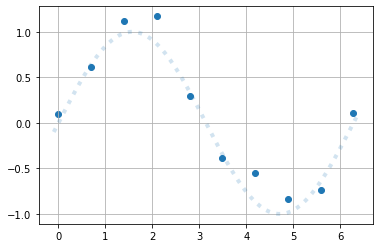

In [4]:
x_axis = np.linspace(-.1, 2 * np.pi + .1, 100)
y_sin = np.sin(x_axis)

xs = np.expand_dims(xs, 1)
x_axis = np.expand_dims(x_axis, 1)

plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()

Let's initialize the neural network with the `MLPRegressor` class which will create a neural network with a linear output function in the output layer  neuron.

In [5]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate_init=0.01,
    max_iter=50,
    tol=1e-4,
    early_stopping=False,
    random_state=42,
    verbose=True,    
    )

With the input parameters we define the following values:
- `hidden_layer_sizes` - number of neurons in the hidden layer of the network,
- `activation` - choice of output nonlinearity of the neurons in the hidden layer of the network,
- `solver` - choice of learning algorithm
- `alpha` - coefficient of $L^2$ regularization, which we denoted above by $\lambda$,
- `batch_size` - batch size,
- `learning_rate_init` - initial value of the learning rate
- `max_iter` - maximum number of epochs of network training,
- `tol` - if the loss changes less than this tolerance threshold within 10 epochs the training will be stopped despite the maximum number of epochs not being reached,
- `early_stopping` - a parameter that enables early stopping of training if the losses calculated on the validation subset start to grow, which is automatically separated from the training set at random,
- `random_state` - setting of the random number generator in order to obtain the same network parameters during its random initialization,
- `verbose` - level of detail output in the network training process.

All these arguments that describe the network architecture and that control the training process are known as **hyperparameters**, as to distinguish them from the actual **parameters** of the neurons in the network - the latter being updated in the training process, and the former not.

To see all the available settings for the neural network, as well as more details about each one, we can type `neural_network.MLPRegressor?`

After we have initialized the network we can train it with the following command:

In [6]:
reg.fit(xs, ys)

Iteration 1, loss = 1.79730213
Iteration 2, loss = 1.69205954
Iteration 3, loss = 1.59169986
Iteration 4, loss = 1.49621502
Iteration 5, loss = 1.40556850
Iteration 6, loss = 1.31969700
Iteration 7, loss = 1.23851098
Iteration 8, loss = 1.16189426
Iteration 9, loss = 1.08970298
Iteration 10, loss = 1.02176477
Iteration 11, loss = 0.95787993
Iteration 12, loss = 0.89782678
Iteration 13, loss = 0.84137310
Iteration 14, loss = 0.78829203
Iteration 15, loss = 0.73837773
Iteration 16, loss = 0.69145581
Iteration 17, loss = 0.64738671
Iteration 18, loss = 0.60606433
Iteration 19, loss = 0.56741246
Iteration 20, loss = 0.53138080
Iteration 21, loss = 0.49794070
Iteration 22, loss = 0.46707996
Iteration 23, loss = 0.43879543
Iteration 24, loss = 0.41308237
Iteration 25, loss = 0.38992005
Iteration 26, loss = 0.36925447
Iteration 27, loss = 0.35098048
Iteration 28, loss = 0.33492811
Iteration 29, loss = 0.32085881
Iteration 30, loss = 0.30847557
Iteration 31, loss = 0.29744608
Iteration 32, los

/home/vibe/miniconda3/envs/work/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=50, random_state=42, verbose=True)

From the printout, we can see that the training did not converge, that is, the loss was still decreasing before the training was stopped due to reaching the maximum number of epochs. In other words, our network is **under fitting**.

We can now use the trained network to predict values for the learned function:

In [7]:
y_pred_under = reg.predict(x_axis)

And show the results:

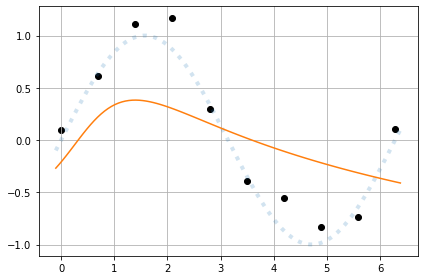

In [8]:
# %% plot results
plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under)
plt.grid()
plt.tight_layout()

We can see that the network described the points of the training set relatively well, but did not learn the objective function.

To retrain the network we will initialize it with new parameters and run training again.

In [9]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=500,
    tol=1e-4,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=500, random_state=42)

We can see that now the training has converged. Let's show the results.

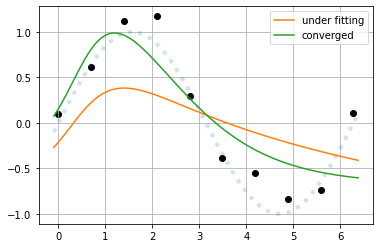

In [10]:
y_pred = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="under fitting")
plt.plot(x_axis, y_pred, label="converged")
plt.grid()
plt.legend()

We can see that after converging the network got closer to the target function.

Let's show the parameters of the trained network:
- the last value of the loss,
- the number of epochs in training,
- weights of the neurons in the network, and
- biases of the neurons in the network.

In [11]:
print("loss", reg.loss_)
print("epochs", reg.n_iter_)
print("weights", reg.coefs_)
print("biases", reg.intercepts_)

loss 0.05925160789377685
epochs 274
weights [array([[ 0.45417082,  1.30731649,  0.57117395,  0.35249836, -1.01839051]]), array([[-0.82887394],
       [ 0.79547048],
       [ 0.51462409],
       [-0.86270602],
       [-0.46653341]])]
biases [array([-0.92192804, -0.58288423,  1.25031575, -0.38712043,  0.04991098]), array([-0.7600417])]


We can see that the training finished in 274 epochs, and the final loss value was 0.059. This is less than the last loss when we stopped training at epoch 50 (0.14).

Let's also plot the change in the loss during training.

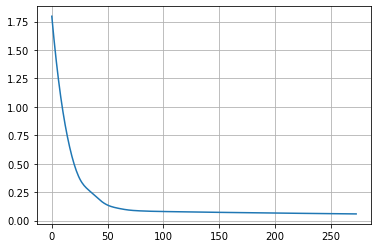

In [12]:
plt.plot(reg.loss_curve_)
plt.grid()

We have already seen how changing one of the hyperparameters (the maximum number of epochs) had an impact on the training process.

Let's do some experiments to see how the rest of the hyperparameters affect the performance of the resulting network.

### Experiment 1. Changing the Number of Neurons

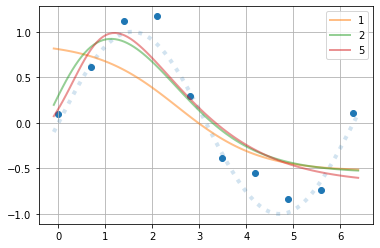

In [13]:
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for neurons in [1, 2, 5]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=neurons,
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=neurons)

plt.legend()

We can see that with 1 neuron in the hidden layer at the output of the network we get its output non-linearity function `tanh`. Already with 2 neurons the network can learn a function close to the target. This illustrates the need for the power of the model to be appropriate to the problem we want to solve.

### Experiment 2. Changing the Learning Rate

/home/vibe/miniconda3/envs/work/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


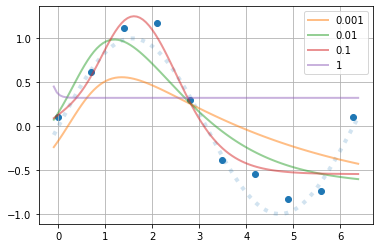

In [14]:
# %% try different learning rates
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for learn in [0.001, 0.01, 0.1, 1]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=learn,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=learn)

plt.legend()

The graph clearly shows the influence of the learning rate on the training process. For very large values (1) we can see that training has completely failed. We have better results for values of 0.1 and 0.01. For small values (0.001) we can see that the training did not converge within the same number of epochs as for larger values.

### Experiment 3. Changing the Training Initialization

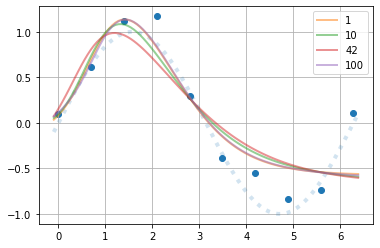

In [15]:
# %% try different starting points
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for seed in [1, 10, 42, 100]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=seed,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=seed)

plt.legend()

We can see that indeed the starting point does affect the final result of the training process.

### Experiment 4. Regularization

To illustrate the need for network regularization, let's try what happens if we decrease the stopping tolerance and increase the maximum number of epochs.

In [16]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=5000,
    tol=1e-9,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=5000, random_state=42, tol=1e-09)

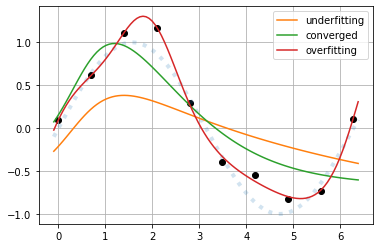

In [17]:
y_pred_over = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="underfitting")
plt.plot(x_axis, y_pred, label="converged")
plt.plot(x_axis, y_pred_over, label="overfitting")
plt.grid()
plt.legend()

We can see that the network has learned the training set perfectly. This is called **overfitting**. This is of course an undesirable result, because we want the network to be able to perform well on data that is not part of the training set.

We can conclude that a higher value of `tol` stopped the training before the network parameters were retuned. In fact it induced **early stopping**, which is another strategy for regularization.

Let's see what impact regularization will have on the training process.

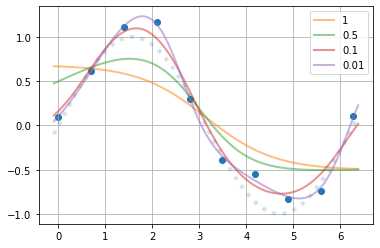

In [18]:
# %% tweak regularisation
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for alpha in [1, 0.5, 0.1, 0.01]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=alpha,
        learning_rate_init=0.01,
        max_iter=10000,
        tol=1e-9,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=alpha)

plt.legend()

We can see the effect of too much regularization. In the case where $\lambda$ is 1 the network does not learn from the training set at all. For too small values (0.01) the network is overfitting again. For a value of 0.1 we get the best results not only in this experiment, but also overall - for all experiments so far.